# Plain sinusoid autoencoder

The goal is to encode a signal consisting of sinusoid samples and decode it back.

In [26]:
%pylab inline
import keras
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Input signal. Single training example.

(1, 50)


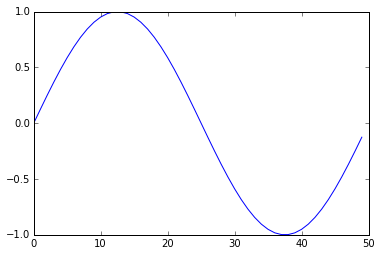

In [27]:
t = np.arange(50).reshape(1, -1)
x = np.sin(2*np.pi/50*t)
print(x.shape)
plot(t[0], x[0]);

Simple autoencoder of four layers: 50 -> 25 -> 12 -> 25 -> 50.

In [28]:
from keras.models import Sequential
from keras.layers import containers
from keras.layers.core import Dense, AutoEncoder

encoder = containers.Sequential([Dense(25, input_dim=50), Dense(12)])
decoder = containers.Sequential([Dense(25, input_dim=12), Dense(50)])

model = Sequential()
model.add(AutoEncoder(encoder=encoder, decoder=decoder, output_reconstruction=True))

model.compile(loss='mean_squared_error', optimizer='sgd')

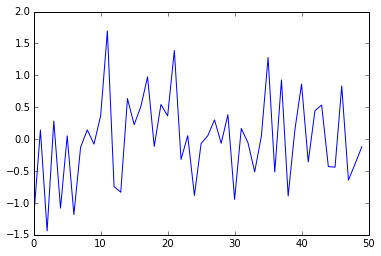

In [29]:
# prediction with initial weight should be random
plot(model.predict(x)[0]);

In [30]:
# train the model and store the loss values as function of time
from loss_history import LossHistory
loss_history = LossHistory()
model.fit(x, x, nb_epoch=500, batch_size=1, callbacks=[loss_history])

Epoch 1/500
1/1 [==============================] - 0s - loss: 0.9343
Epoch 2/500
1/1 [==============================] - 0s - loss: 0.8351
Epoch 3/500
1/1 [==============================] - 0s - loss: 0.7614
Epoch 4/500
1/1 [==============================] - 0s - loss: 0.7052
Epoch 5/500
1/1 [==============================] - 0s - loss: 0.6615
Epoch 6/500
1/1 [==============================] - 0s - loss: 0.6269
Epoch 7/500
1/1 [==============================] - 0s - loss: 0.5992
Epoch 8/500
1/1 [==============================] - 0s - loss: 0.5766
Epoch 9/500
1/1 [==============================] - 0s - loss: 0.5581
Epoch 10/500
1/1 [==============================] - 0s - loss: 0.5426
Epoch 11/500
1/1 [==============================] - 0s - loss: 0.5297
Epoch 12/500
1/1 [==============================] - 0s - loss: 0.5187
Epoch 13/500
1/1 [==============================] - 0s - loss: 0.5092
Epoch 14/500
1/1 [==============================] - 0s - loss: 0.5011
Epoch 15/500
1/1 [===========

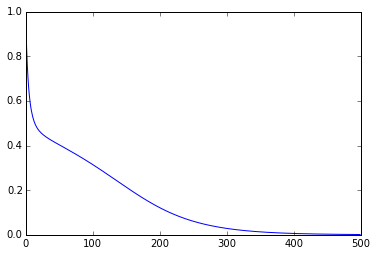

In [31]:
plot(loss_history.losses);

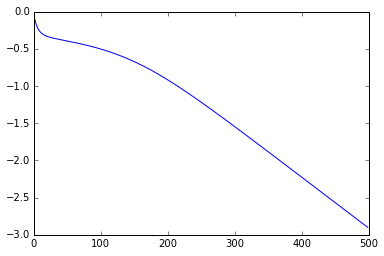

In [32]:
plot(log10(loss_history.losses));

The model fits the data quite nicely.

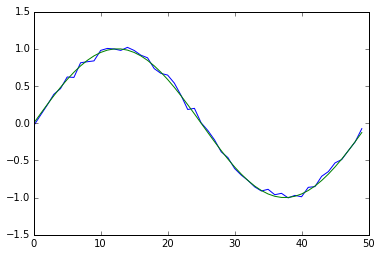

In [33]:
plot(model.predict(x)[0])
plot(x[0]);

The model is able to predict on noise-corrupted data.

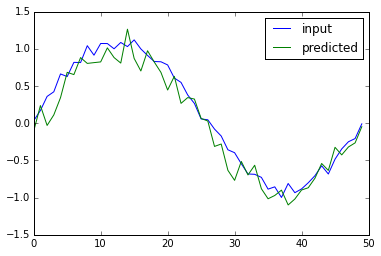

In [34]:
x_noised = x + 0.2 * np.random.random(len(x[0]))
plot(x_noised[0], label='input')
plot(model.predict(x_noised)[0], label='predicted')
legend();

However the model does is not able to predict a sinusoid with different phase.

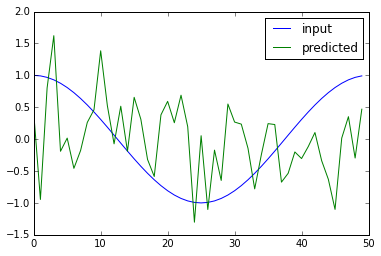

In [35]:
x_shifted = np.cos(2*np.pi/50*t)
plot(x_shifted[0], label='input')
plot(model.predict(x_shifted)[0], label='predicted')
legend();

The model is able to deal with scaled sinuoid, but the farther it is from the original amplitude, the more noise.

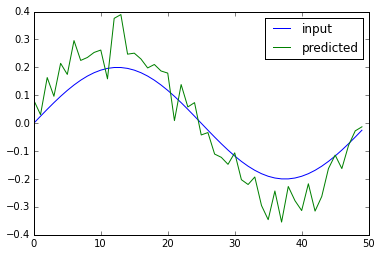

In [36]:
x_scaled = 0.2 * x
plot(x_scaled[0], label='input')
plot(model.predict(x_scaled)[0], label='predicted')
legend();